In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The Data

This data was retrieved from the Washington Post (via https://github.com/washingtonpost/data-police-shootings) and records several features about people shot and killed by police from 2015-2020. 

In [2]:
data = pd.read_csv("fatal-police-shootings-data.csv")
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].map(lambda x: x.year)
data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False,2015
6,13,Kenneth Arnold Buck,2015-01-05,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False,2015
7,15,Brock Nichols,2015-01-06,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False,2015
8,16,Autumn Steele,2015-01-06,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True,2015
9,17,Leslie Sapp III,2015-01-06,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False,2015


## The number of people shot and killed by police has been consistent from 2015 through 2019

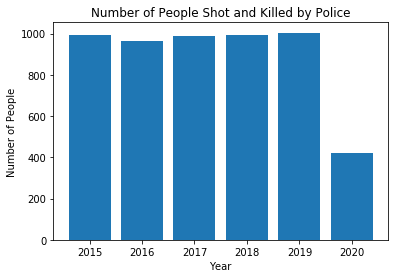

In [3]:
data_by_year = data.groupby(['year']).count()
fig, ax = plt.subplots()
ax.set_xlabel("Year")
ax.set_ylabel("Number of People")
plt.bar(x=data_by_year.index, height=data_by_year['id'])
plt.title("Number of People Shot and Killed by Police")
plt.show()

# Number of People Killed by Police from 2015-2020

Since 2015, over 5000 people have been killed by the police in various circumstances. It appears that white people tend to be killed by cops more often than any other race. However, there is more to this story.

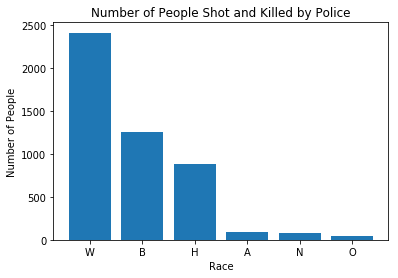

In [4]:
data_by_race = data.groupby(['race']).count().sort_values(by=['id'], ascending=False)
fig, ax = plt.subplots()
ax.set_xlabel("Race")
ax.set_ylabel("Number of People")
plt.bar(x=data_by_race.index, height=data_by_race['id'])
plt.title("Number of People Shot and Killed by Police")
plt.show()

# United States Demographics (2019 Estimates)

According to census.gov (via https://www.census.gov/quickfacts/fact/table/US/PST045219), with a total of 328,239,523 people living in the US,

- White people make up 76.5% of the US population (251,103,235 people)
- Hispanic or Latino people make up 18.3% of the population (60,067,833 people)
- Black people make up 13.4% of the US population (43,984,096 people)
- Asian people make up 5.9% of the US population (19,366,132 people)
- Native American people make up 1.5% of the US population (4,923,592 people)

In [5]:
data_by_race = data_by_race[['name', 'id']]
data_by_race = data_by_race[data_by_race.index != 'O']
race_props = pd.Series(data=[19366132, 43984096, 60067833, 4923592,251103235], index=['A', 'B', 'H', 'N', 'W'])
data_by_race['id'] = data_by_race['id'] / race_props
data_by_race = data_by_race.rename(columns={'name':'count', 'id':'proportion'})
data_by_race = data_by_race.sort_values(by=['proportion'], ascending=False)
data_by_race

,count,proportion
race,,
B,1260,0.000029
N,77,0.000016
H,887,0.000015
W,2410,0.000010
A,93,0.000005


# Minorities are Killed by Police at a Higher Rate than White People

The previous figure showed that more white people have been killed over the past 5 years than any other race, a statistic that can understandably skew peoples' perspectives. However, when you take into account that the United States has many more white people (76.5% of the population), it makes more sense to look at proportions. **Black people are killed at a rate 3 times higher than white people.** This is indicative of a phenomenon larger than just the law enforcement system itself. We need to look at *why* these individuals are being killed.

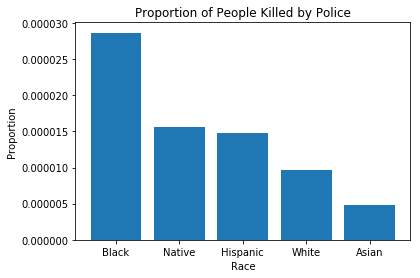

In [6]:
fig, ax = plt.subplots()
ax.set_xlabel("Race")
ax.set_ylabel("Proportion")
plt.bar(x=['Black', 'Native', 'Hispanic', 'White', 'Asian'], height=data_by_race['proportion'])
plt.title("Proportion of People Killed by Police")
plt.show()

In [7]:
num_black_unarmed_prop = len(data.loc[(data['race']=='B') & (data['armed']=='unarmed')])/1260
num_white_unarmed_prop = len(data.loc[(data['race']=='W') & (data['armed']=='unarmed')])/2410
num_native_unarmed_prop = len(data.loc[(data['race']=='N') & (data['armed']=='unarmed')])/77
num_hispanic_unarmed_prop = len(data.loc[(data['race']=='H') & (data['armed']=='unarmed')])/887
num_asian_unarmed_prop = len(data.loc[(data['race']=='A') & (data['armed']=='unarmed')])/93
unarmed_props = [num_black_unarmed_prop, num_hispanic_unarmed_prop, num_white_unarmed_prop, num_asian_unarmed_prop, num_native_unarmed_prop]

## Of all fatal shootings by police by race, unarmed black people make up the highest proportion.

When we look at the shootings by race, we see that almost 10% of black people killed by police were unarmed. This figure is over 50% greater than the same proportion for white people.

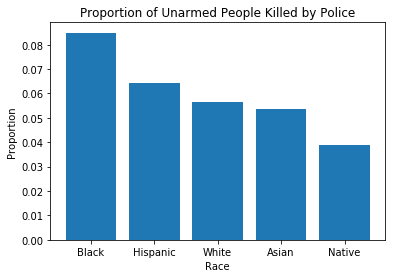

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel("Race")
ax.set_ylabel("Proportion")
plt.bar(x=['Black', 'Hispanic', 'White', 'Asian', 'Native'], height=unarmed_props)
plt.title("Proportion of Unarmed People Killed by Police")
plt.show()

In [9]:
num_black_unarmed_prop/num_white_unarmed_prop

1.50484360410831